In [66]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
# Import dataset into dataframe
ca_fire_data = pd.read_csv('Resources/CA_Fires.csv', parse_dates=['DISCOVERY_DATE', 'CONT_DATE'], dtype={'FIRE_YEAR': 'int64', 'LOCAL_INCIDENT_ID': str, 'FIRE_CODE': str, 'COUNTY': str})
ca_fire_data['duration'] = (ca_fire_data['CONT_DATE'] - ca_fire_data['DISCOVERY_DATE']).dt.days

# Print columns and sample data
print(ca_fire_data.columns)
ca_fire_data

Index(['FPA_ID', 'NWCG_REPORTING_UNIT_NAME', 'FIRE_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_DESCR', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME',
       'duration'],
      dtype='object')


,FPA_ID,NWCG_REPORTING_UNIT_NAME,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,CONT_DATE,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,COUNTY,FIPS_CODE,FIPS_NAME,duration
0,FS-1418826,Plumas National Forest,FOUNTAIN,2005,2005-02-02,33,1300.0,Human,Power generation/transmission/distribution,2005-02-02,...,1730.0,0.10,A,40.036944,-121.005833,USFS,63,6063.0,Plumas County,0.0
1,FS-1418827,Eldorado National Forest,PIGEON,2004,2004-05-12,133,845.0,Natural,Natural,2004-05-12,...,1530.0,0.25,A,38.933056,-120.404444,USFS,61,6061.0,Placer County,0.0
2,FS-1418835,Eldorado National Forest,SLACK,2004,2004-05-31,152,1921.0,Human,Debris and open burning,2004-05-31,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,17,6017.0,El Dorado County,0.0
3,FS-1418845,Eldorado National Forest,DEER,2004,2004-06-28,180,1600.0,Natural,Natural,2004-07-03,...,1400.0,0.10,A,38.559167,-119.913333,USFS,3,6003.0,Alpine County,5.0
4,FS-1418847,Eldorado National Forest,STEVENOT,2004,2004-06-28,180,1600.0,Natural,Natural,2004-07-03,...,1200.0,0.10,A,38.559167,-119.933056,USFS,3,6003.0,Alpine County,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251876,ICS209_2019_10757785,Ventura County Fire Department,MARIA,2019,2019-10-31,304,2115.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaT,...,NaN,9999.00,G,34.337222,-119.053333,MISSING/NOT SPECIFIED,Ventura,6111.0,Ventura County,NaN
251877,ICS209_2019_10762771,San Luis Obispo Unit,BELMONT,2019,2019-05-29,149,1900.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaT,...,NaN,835.00,E,35.307500,-119.964444,MISSING/NOT SPECIFIED,San Luis Obispo,6079.0,San Luis Obispo County,NaN
251878,ICS209_2019_10781965,Santa Clara Unit,ROCK,2019,2019-06-25,176,2230.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaT,...,NaN,2422.00,F,37.472222,-121.249444,MISSING/NOT SPECIFIED,Stanislaus,6099.0,Stanislaus County,NaN
251879,ICS209_2019_10802166,Plumas National Forest,WALKER,2019,2019-09-04,247,1446.0,Missing data/not specified/undetermined,Missing data/not specified/undetermined,NaT,...,NaN,54608.00,G,40.053250,-120.668900,MISSING/NOT SPECIFIED,Plumas,6063.0,Plumas County,NaN


# 1) Number of Fires Each Year

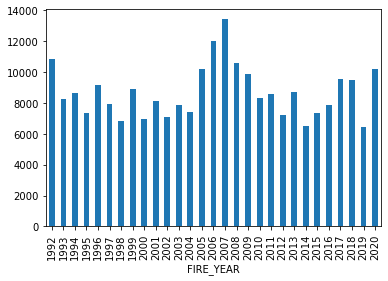

In [91]:
fires_per_year = ca_fire_data.groupby('FIRE_YEAR').count()['FPA_ID']
fires_per_year.plot(kind='bar')
plt.show()

# 2) Avg. Acreage Burned Each Year

FIRE_YEAR
1992     27.369550
1993     38.884240
1994     47.053463
1995     29.273635
1996     77.111112
1997     40.939165
1998     23.321455
1999     90.259648
2000     37.972855
2001     42.893605
2002     72.472605
2003    130.902363
2004     40.621746
2005     25.830488
2006     68.043348
2007     79.055280
2008    135.356857
2009     47.172885
2010     15.402844
2011     22.462374
2012    106.246086
2013     66.660201
2014     84.372181
2015    115.355233
2016     72.933641
2017    142.619272
2018    172.402782
2019     45.649360
2020    417.083241
Name: FIRE_SIZE, dtype: float64

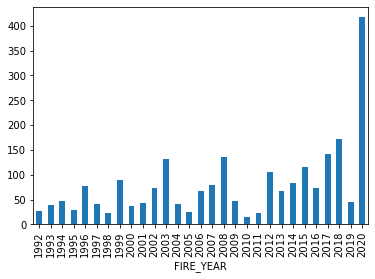

In [92]:
acres_burned = ca_fire_data.groupby('FIRE_YEAR').mean()['FIRE_SIZE']
acres_burned.plot(kind='bar')
acres_burned

FIRE_YEAR
1992     296439.600
1993     321494.900
1994     406965.400
1995     216068.700
1996     707108.900
1997     324565.700
1998     160008.500
1999     804123.200
2000     264670.800
2001     350140.500
2002     515860.000
2003    1033343.250
2004     300885.270
2005     263961.760
2006     819105.820
2007    1061554.300
2008    1433970.540
2009     465218.990
2010     127905.220
2011     192277.920
2012     764759.330
2013     581410.272
2014     547828.570
2015     848437.740
2016     574862.960
2017    1360160.000
2018    1635757.600
2019     294620.970
2020    4253414.890
Name: FIRE_SIZE, dtype: float64

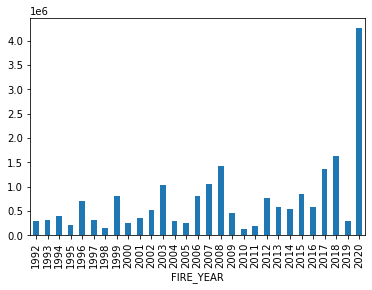

In [93]:
acres_burned = ca_fire_data.groupby('FIRE_YEAR').sum()['FIRE_SIZE']
acres_burned.plot(kind='bar')
acres_burned

# 3) Causes of Fires

In [94]:
causes = ca_fire_data.groupby(['NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE']).count()['FPA_ID']
# top_5_causes = causes.loc[causes['FPA_ID'] > 10000]['FPA_ID']
# top_5_causes
causes

NWCG_CAUSE_CLASSIFICATION                NWCG_GENERAL_CAUSE                        
Human                                    Arson/incendiarism                            24412
                                         Debris and open burning                       20861
                                         Equipment and vehicle use                     45660
                                         Firearms and explosives use                     275
                                         Fireworks                                       645
                                         Missing data/not specified/undetermined       56845
                                         Misuse of fire by a minor                      9316
                                         Other causes                                    784
                                         Power generation/transmission/distribution     3677
                                         Railroad operations and maintenance   

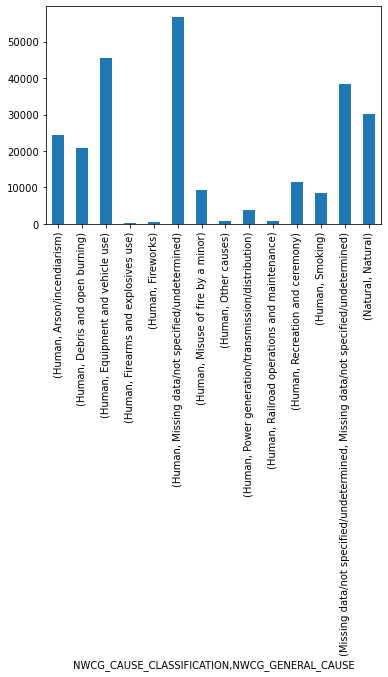

In [95]:
causes.plot(kind='bar')
plt.show()

In [96]:
cause_class = ca_fire_data.groupby(['NWCG_CAUSE_CLASSIFICATION']).count()
cause_class.head()

,FPA_ID,NWCG_REPORTING_UNIT_NAME,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,NWCG_GENERAL_CAUSE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,COUNTY,FIPS_CODE,FIPS_NAME,duration
NWCG_CAUSE_CLASSIFICATION,,,,,,,,,,,,,,,,,,,,
Human,183173,183173,159344,183173,183173,183173,140931,183173,97166,97166,96000,183173,183173,183173,183173,183173,107997,107997,107997,97166
Missing data/not specified/undetermined,38418,38418,17177,38418,38418,38418,37911,38418,10608,10608,10440,38418,38418,38418,38418,38418,35426,35426,35426,10608
Natural,30290,30290,27991,30290,30290,30290,27974,30290,26228,26228,25844,30290,30290,30290,30290,30290,13733,13733,13733,26228


# 4) Avg. Acreage By Cause

# 5) Size vs Length (Speed of fire) - Ken

# 6) Speed vs MOY

# Question 7 (Code Below)

In [97]:
no_dur = ca_fire_data.loc[ca_fire_data['duration'].isna()]
group_no_dur = no_dur.groupby(['NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE']).count()['FPA_ID']
group_no_dur

NWCG_CAUSE_CLASSIFICATION                NWCG_GENERAL_CAUSE                        
Human                                    Arson/incendiarism                            11084
                                         Debris and open burning                        9945
                                         Equipment and vehicle use                     21963
                                         Firearms and explosives use                       9
                                         Fireworks                                        23
                                         Missing data/not specified/undetermined       28615
                                         Misuse of fire by a minor                      6188
                                         Other causes                                     26
                                         Power generation/transmission/distribution     1145
                                         Railroad operations and maintenance   

# Question 8 (Code Below)

In [99]:
causes = ca_fire_data.groupby(['NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE']).count()['FPA_ID']
causes

NWCG_CAUSE_CLASSIFICATION                NWCG_GENERAL_CAUSE                        
Human                                    Arson/incendiarism                            24412
                                         Debris and open burning                       20861
                                         Equipment and vehicle use                     45660
                                         Firearms and explosives use                     275
                                         Fireworks                                       645
                                         Missing data/not specified/undetermined       56845
                                         Misuse of fire by a minor                      9316
                                         Other causes                                    784
                                         Power generation/transmission/distribution     3677
                                         Railroad operations and maintenance   